## In this code I design a CNN model to predict whether the input image normal or Abnormal

- The data has been collected from local hospitals and medical clinic 
- The model have only two classes Normal = 0 , Abnormal =1
- The model could not predict more than two classes due to small dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.models import load_model
#from imgaug import augmenters as iaa
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D,Convolution2D
from sklearn.model_selection import train_test_split
import random
#import pickle
import pandas as pd
import cv2
import os
#import skimage
 
#from keras.callbacks import LearningRateScheduler, ModelCheckpoint
 
%matplotlib inline
np.random.seed(0)

Using TensorFlow backend.


## First I have to Create the dataset by the following steps :

1. Creating two list for both the image name and the lebels.
1. I build the dataset using pandas (pd.Series(data=my_img)).
1. By using the image name I could add the path therefor I could read the images. 
1. img_preprocess was created to pre process the images by reshape theme and add noise.
1. Converting the two list into Arrays.

In [2]:
def do_dataset(x,y):
    my_img=[]
    my_label=[]
    for i in range(x):
        my_img.append('x{}.jpg'.format((i+1)))
        my_label.append(0)
    for i in range(y):
        my_img.append('y{}.jpg'.format((i+1)))
        my_label.append(1)
    return my_img,my_label

In [3]:
my_img,my_label=do_dataset(212,204)

In [4]:
my_series=pd.Series(data=my_img)
data=pd.DataFrame(my_series)
data['label']=my_label
data

,0,label
0,x1.jpg,0
1,x2.jpg,0
2,x3.jpg,0
3,x4.jpg,0
4,x5.jpg,0
...,...,...
411,y200.jpg,1
412,y201.jpg,1
413,y202.jpg,1
414,y203.jpg,1


In [5]:
def load_img_label(datadir, df):
  image_path = []
  label = []
  for i in range(len(df)):
    indexed_data = data.iloc[i]
    img = indexed_data[0]
    image_path.append(os.path.join(datadir, img.strip()))
    label.append(indexed_data['label'])
  image_paths = np.asarray(image_path)
  label = np.asarray(label)
  return image_paths, label

In [6]:
def img_preprocess(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #imgcv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (155, 155))
    img = img[40:120,40:120]
    img = img/255
    return img

In [7]:
def data_gen(image_paths, label_ang):

    batch_img = []
    batch_label = []
    
    for i in range(len(image_paths)):
      im=mpimg.imread(image_paths[i])
      im=img_preprocess(im)  
      im = np.expand_dims(im, axis=-1)
      labell =label[i]
      batch_img.append(im)
      batch_label.append(labell)
      A=np.asarray(batch_img)
      B=np.asarray(batch_label)
    return A,B

In [8]:
image_paths, label = load_img_label('' , data)
xx_train_gen, yy_train_gen = data_gen(image_paths, label)

### As a result we creat a traning set for the images and lebels  
the numbers from the xx_train_gen are as follow :
- 416 the number of the images 
- 80 , 80 is the image shape 
- 1 is the number of the channel 

In [10]:
print(xx_train_gen.shape)

(416, 80, 80, 1)


### The CNN model that I create is basic sequential model using Conv2D and Maxpooling2D and fully connected layers.
- I use the Adam compiler to measure the Accuracy and loss.
- For validation I split the data 5 % from the total dataset.

In [11]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(80, 80, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [15]:
model = modified_model()
print(model.summary())
history = model.fit(xx_train_gen, yy_train_gen, validation_split=0.05, epochs =18, batch_size =20, verbose = 1, shuffle = 1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 76, 76, 60)        1560      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 60)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 36, 36, 30)        16230     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 30)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9720)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               2430250   
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)              

In [16]:
import json

# lets assume `model` is main model 
model_json = model.to_json()
with open("model_in_json_KHALED.json", "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights("khaledMODEL.h5")

In [17]:
import json
from keras.models import load_model
from keras.models import model_from_json
with open('model_in_json_KHALED.json','r') as f:
    model_json = json.load(f)

model = model_from_json(model_json)
model.load_weights('khaledMODEL.h5')

### The model was fit very well , and the following plots were the results of the accuracy and loss :
- the resulting plot was having peaks resulting from the low number of data.

Text(0.5, 0, 'epoch')

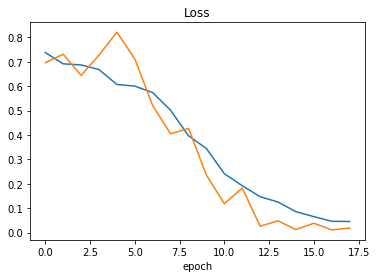

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

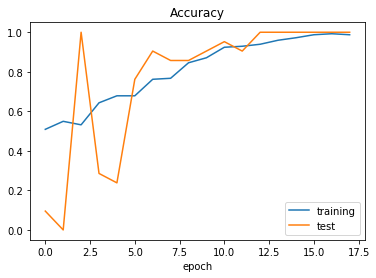

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [20]:
def count_error_class(x):
    error=0
    img_error=[]
    for i in range(x):
        im=mpimg.imread(image_paths[i])
        im=img_preprocess(im)
        im = np.expand_dims(im, axis=-1)
        im = np.expand_dims(im, axis=0)
        if model.predict_classes(im)!=my_label[i]:
            error=error+1
            path1=image_paths[i]
            img_error.append(path1)
    return error,img_error

In [21]:
A,B=count_error_class(416)
A

0

# Testing the model 

(80, 80)
0.46155167
[1]


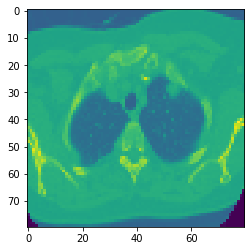

In [61]:
im=mpimg.imread('t13.jpg')

im=img_preprocess(im)
print(im.shape)

plt.imshow(im)
im = np.expand_dims(im, axis=-1)
im = np.expand_dims(im, axis=0)
            
#print("predicted sign: "+ str(model.predict_classes(im)))
preds = model.predict(im)
print(preds[0][0])
print(model.predict_classes(im))